In [ ]:
# Libraries #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.inspection import permutation_importance

In [ ]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [ ]:
# Load data from CSV file
df_hobbies = pd.read_csv('responses.csv')
df = df_hobbies
list_to_drop = df_hobbies.columns[0:31]
list_to_drop_2 = df_hobbies.columns[63:]
df_hobbies =df_hobbies.drop(list_to_drop,axis=1)
df_hobbies.drop(list_to_drop_2,axis=1,inplace = True)
df_hobbies.dropna(axis=0,inplace = True)

df_hobbies.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0


In [ ]:
df = pd.read_csv('responses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


is there any connection between the location (village or city) and the intersts.

In [ ]:
#slicing the wanted cols- life interests and the village/city
cols_to_drop = list(range(31)) + list(range(63, 148)) + list(range(149, 150))
lifeInterestsDf = df.drop(df.columns[cols_to_drop], axis=1)

#changing the values village = 1 city = 0

lifeInterestsDf['Village - town'] = lifeInterestsDf['Village - town'].replace({'village': 1, 'city': 0})

# removing missing values
lifeInterestsDf.dropna(axis=0,inplace = True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lifeInterestsDf.iloc[:, :-1], lifeInterestsDf.iloc[:, -1], test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.7344632768361582


In [ ]:
#preform a feature selection to get an idea what features are more importent

# Separate the features and target variable
X = lifeInterestsDf.drop('Village - town', axis=1)
y = lifeInterestsDf['Village - town']

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier and get feature importances
rf.fit(X, y)
importances = rf.feature_importances_

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)


                   feature  importance
17                Religion    0.042124
24               Gardening    0.038583
27  Science and technology    0.035561
6                       PC    0.035375
1               Psychology    0.034965
31                    Pets    0.034538
2                 Politics    0.034392
30       Adrenaline sports    0.033804
18   Countryside, outdoors    0.033627
23            Active sport    0.033460
11               Geography    0.033436
26                Shopping    0.032842
16         Art exhibitions    0.032238
7       Economy Management    0.032173
19                 Dancing    0.031924
28                 Theatre    0.031840
0                  History    0.031468
8                  Biology    0.030812
12       Foreign languages    0.030704
22           Passive sport    0.030685
10                 Reading    0.030514
13                Medicine    0.030451
15                    Cars    0.029883
14                     Law    0.029736
3              Mathematic

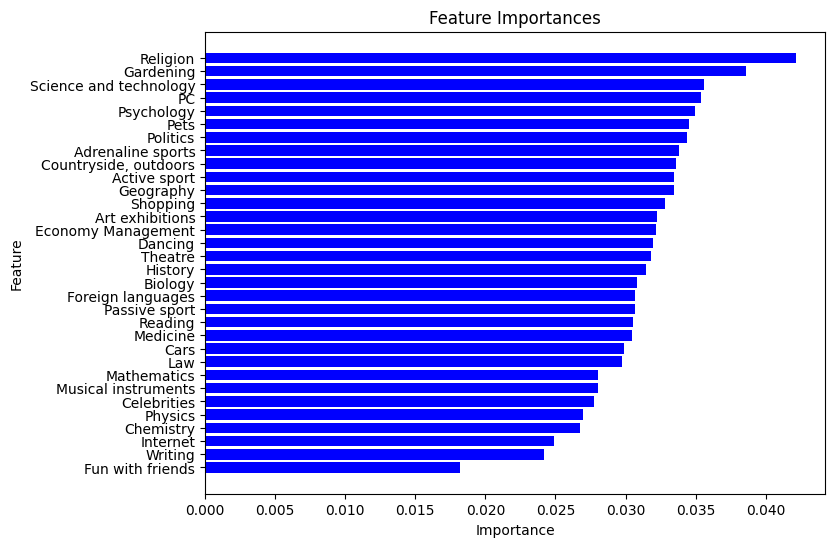

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart
ax.barh(feature_importances['feature'], feature_importances['importance'], color='blue')

# Add axis labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')

# Invert the y-axis so that the most important features are at the top
ax.invert_yaxis()

# Show the plot
plt.show()


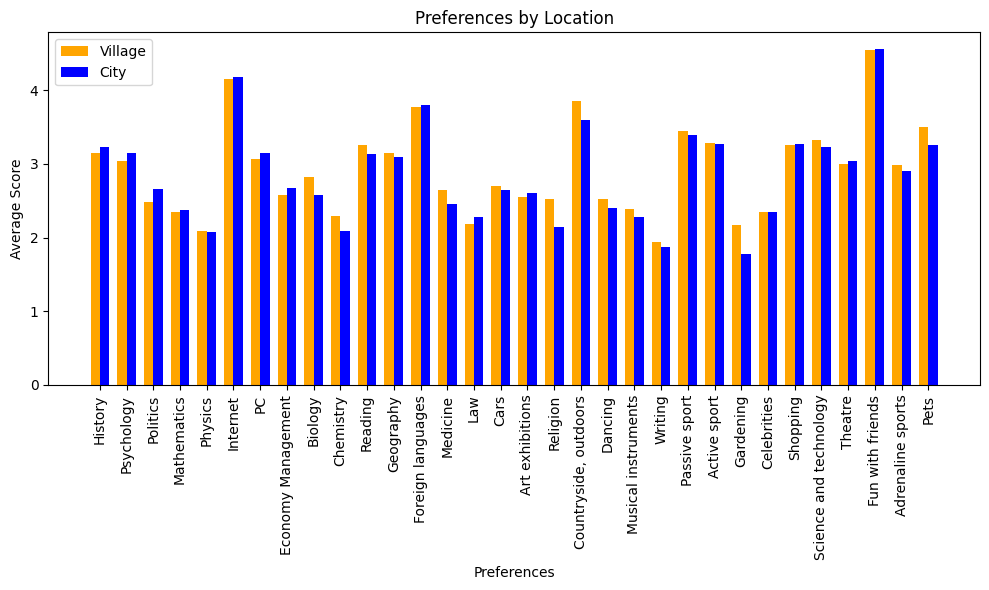

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Separate the preferences based on gender
village_preferences = lifeInterestsDf.loc[lifeInterestsDf['Village - town'] == 1].drop('Village - town', axis=1)
city_preferences = lifeInterestsDf.loc[lifeInterestsDf['Village - town'] == 0].drop('Village - town', axis=1)

# Calculate the average scores for each preference
village_avg_scores = village_preferences.mean()
city_avg_scores = city_preferences.mean()

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(village_avg_scores))
r2 = [x + bar_width for x in r1]

# Plot the preferences for males and females
plt.figure(figsize=(10, 6))
plt.bar(r1, village_avg_scores, color='orange', width=bar_width, label='Village')
plt.bar(r2, city_avg_scores, color='blue', width=bar_width, label='City')

# Customize the plot
plt.xticks([r + bar_width/2 for r in range(len(village_avg_scores))], village_avg_scores.index, rotation='vertical')
plt.xlabel('Preferences')
plt.ylabel('Average Score')
plt.title('Preferences by Location')
plt.legend()
plt.tight_layout()
plt.show()

Accuracy: 0.5932203389830508


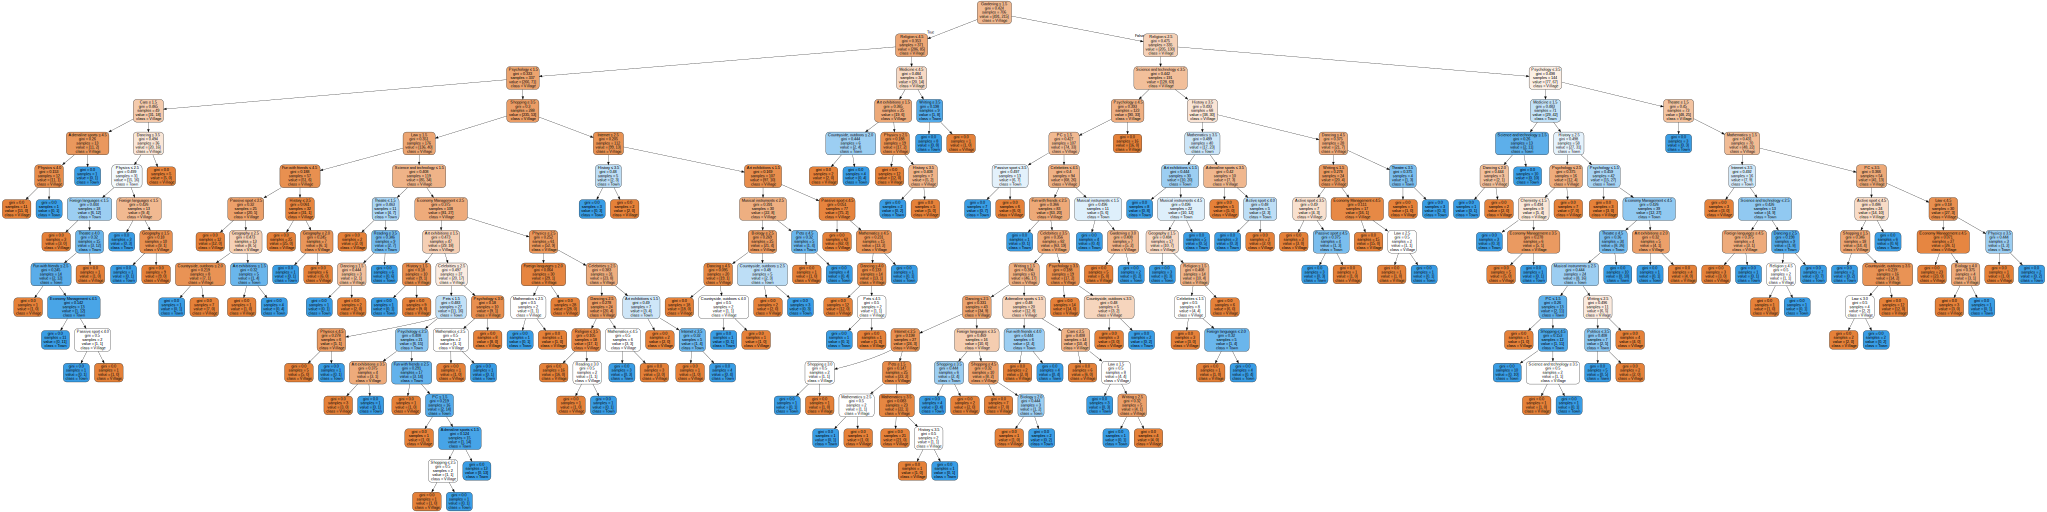

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=['Village', 'Town'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # save the visualization to a file
graph  # display the visualization in the notebook

-------------------------------------------------------------------------------

is there any connection between the gender  and the intersts.

In [ ]:
#slicing the wanted cols- life interests and the gender

cols_to_drop = list(range(31)) + list(range(63, 144)) + list(range(145, 150))
lifeInterests1Df = df.drop(df.columns[cols_to_drop], axis=1)

lifeInterests1Df.head()

lifeInterests1Df['Gender'] = lifeInterests1Df['Gender'].replace({'male': 1, 'female': 0})

# removing missing values
lifeInterests1Df.dropna(axis=0,inplace = True)


Accuracy: 0.8700564971751412
                   feature  importance
6                       PC    0.101263
15                    Cars    0.079512
26                Shopping    0.072517
28                 Theatre    0.061530
10                 Reading    0.058815
27  Science and technology    0.056376
19                 Dancing    0.047039
4                  Physics    0.039553
23            Active sport    0.030877
12       Foreign languages    0.029614
25             Celebrities    0.026321
2                 Politics    0.024936
24               Gardening    0.024730
30       Adrenaline sports    0.024577
16         Art exhibitions    0.023866
0                  History    0.022542
31                    Pets    0.022407
1               Psychology    0.020178
13                Medicine    0.020024
22           Passive sport    0.019556
11               Geography    0.019282
8                  Biology    0.018102
7       Economy Management    0.017408
14                     Law    0.016

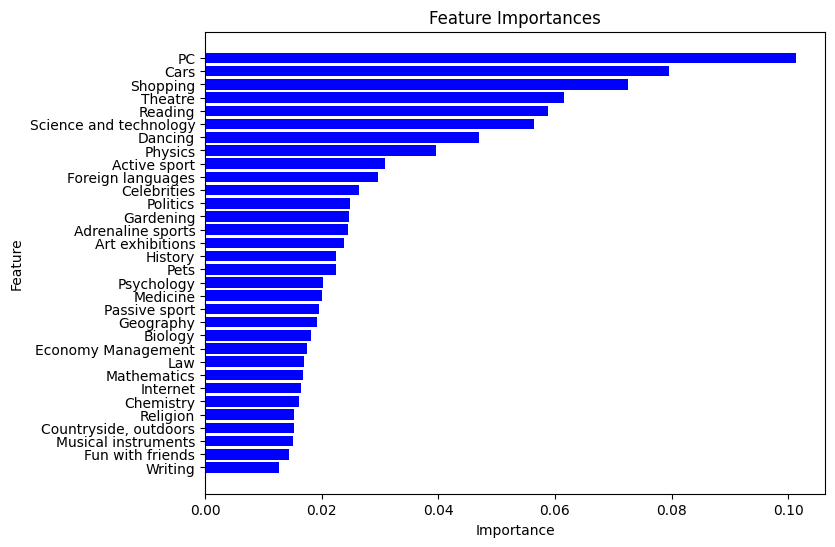

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lifeInterests1Df.iloc[:, :-1], lifeInterests1Df.iloc[:, -1], test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

# Separate the features and target variable
X = lifeInterests1Df.drop('Gender', axis=1)
y = lifeInterests1Df['Gender']

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier and get feature importances
rf.fit(X, y)
importances = rf.feature_importances_

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart
ax.barh(feature_importances['feature'], feature_importances['importance'], color='blue')

# Add axis labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')

# Invert the y-axis so that the most important features are at the top
ax.invert_yaxis()

# Show the plot
plt.show()


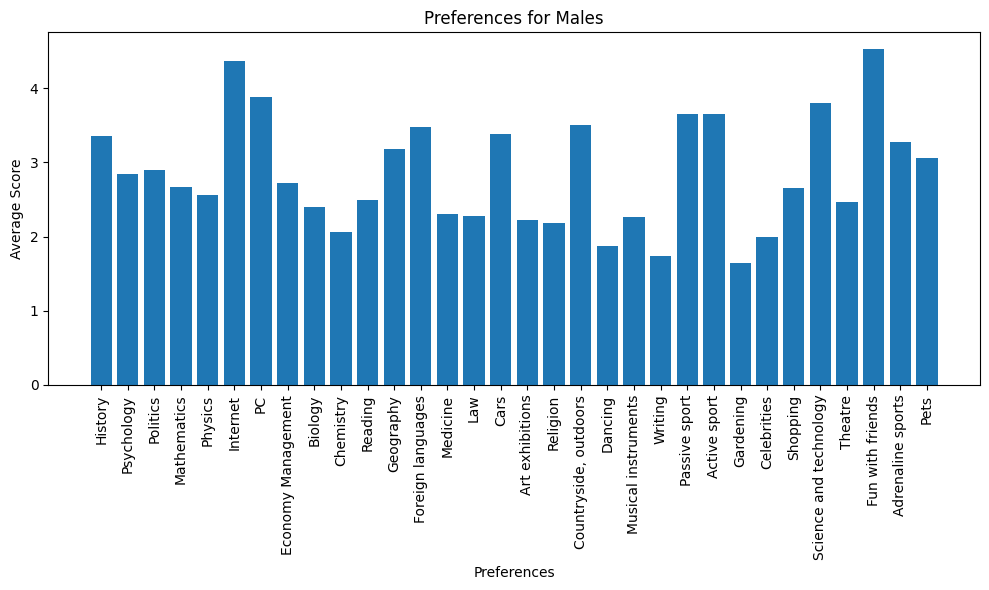

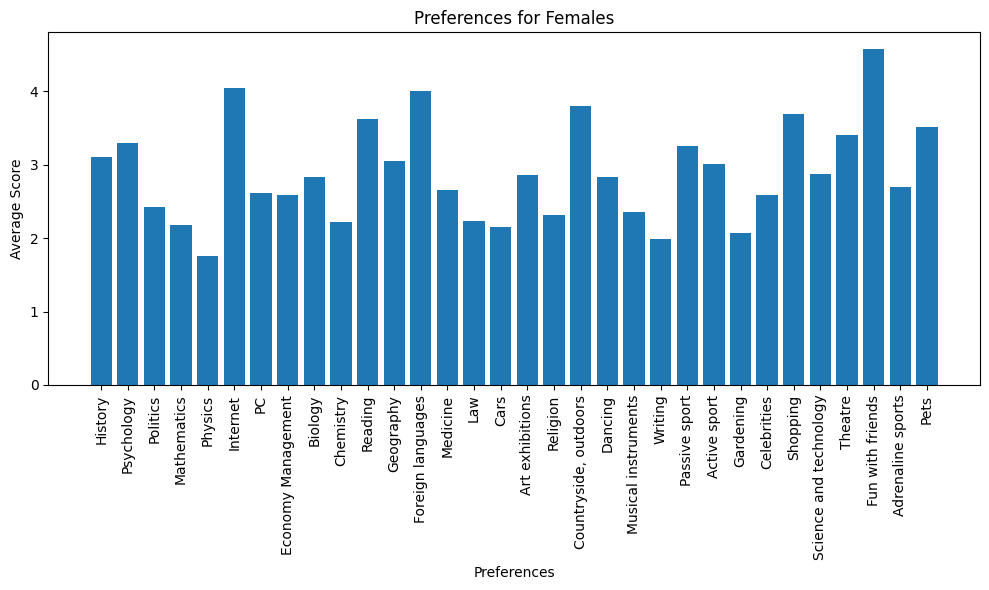

In [ ]:
import matplotlib.pyplot as plt

# Separate the preferences based on gender
male_preferences = lifeInterests1Df.loc[lifeInterests1Df['Gender'] == 1].drop('Gender', axis=1)
female_preferences = lifeInterests1Df.loc[lifeInterests1Df['Gender'] == 0].drop('Gender', axis=1)

# Plot the preferences for males
plt.figure(figsize=(10, 6))
plt.bar(male_preferences.columns, male_preferences.mean())
plt.xticks(rotation='vertical')
plt.xlabel('Preferences')
plt.ylabel('Average Score')
plt.title('Preferences for Males')
plt.tight_layout()
plt.show()

# Plot the preferences for females
plt.figure(figsize=(10, 6))
plt.bar(female_preferences.columns, female_preferences.mean())
plt.xticks(rotation='vertical')
plt.xlabel('Preferences')
plt.ylabel('Average Score')
plt.title('Preferences for Females')
plt.tight_layout()
plt.show()


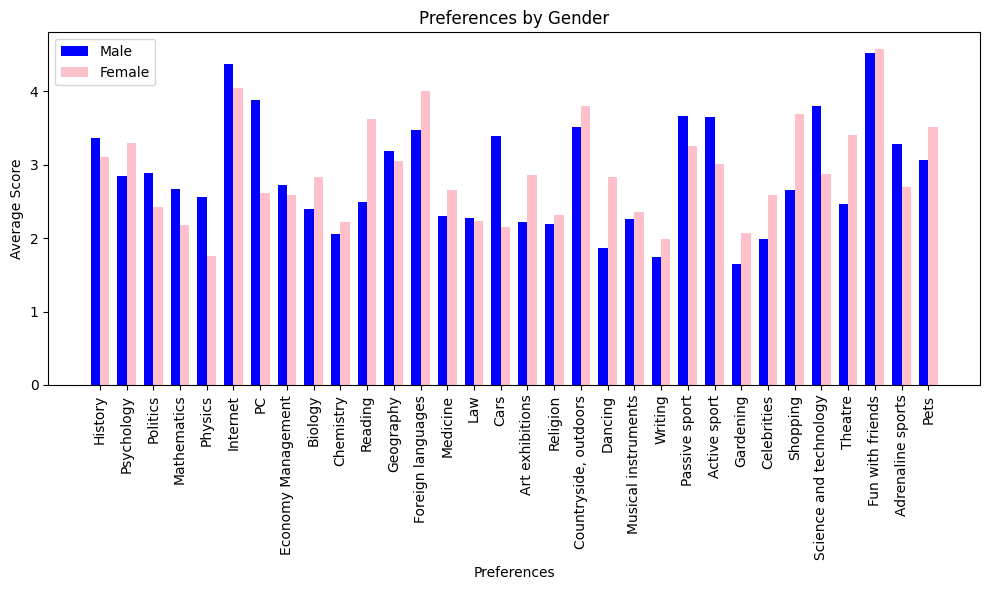

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Separate the preferences based on gender
male_preferences = lifeInterests1Df.loc[lifeInterests1Df['Gender'] == 1].drop('Gender', axis=1)
female_preferences = lifeInterests1Df.loc[lifeInterests1Df['Gender'] == 0].drop('Gender', axis=1)

# Calculate the average scores for each preference
male_avg_scores = male_preferences.mean()
female_avg_scores = female_preferences.mean()

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(male_avg_scores))
r2 = [x + bar_width for x in r1]

# Plot the preferences for males and females
plt.figure(figsize=(10, 6))
plt.bar(r1, male_avg_scores, color='blue', width=bar_width, label='Male')
plt.bar(r2, female_avg_scores, color='pink', width=bar_width, label='Female')

# Customize the plot
plt.xticks([r + bar_width/2 for r in range(len(male_avg_scores))], male_avg_scores.index, rotation='vertical')
plt.xlabel('Preferences')
plt.ylabel('Average Score')
plt.title('Preferences by Gender')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Separate the ratings based on gender
male_ratings = lifeInterests1Df[lifeInterests1Df['Gender'] == 1]['Rating']
female_ratings = lifeInterests1Df[lifeInterests1Df['Gender'] == 0]['Rating']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(male_ratings, female_ratings)

# Print the results
print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)



KeyError: ignored

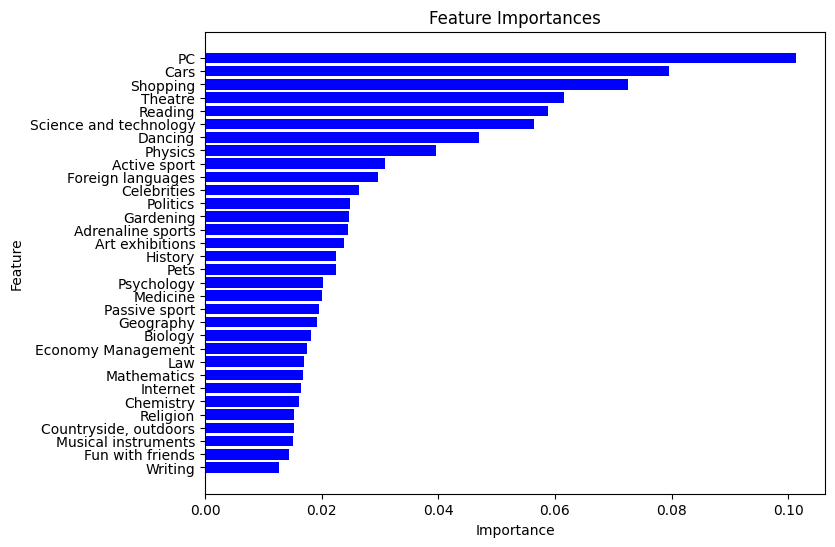

Accuracy: 0.711864406779661


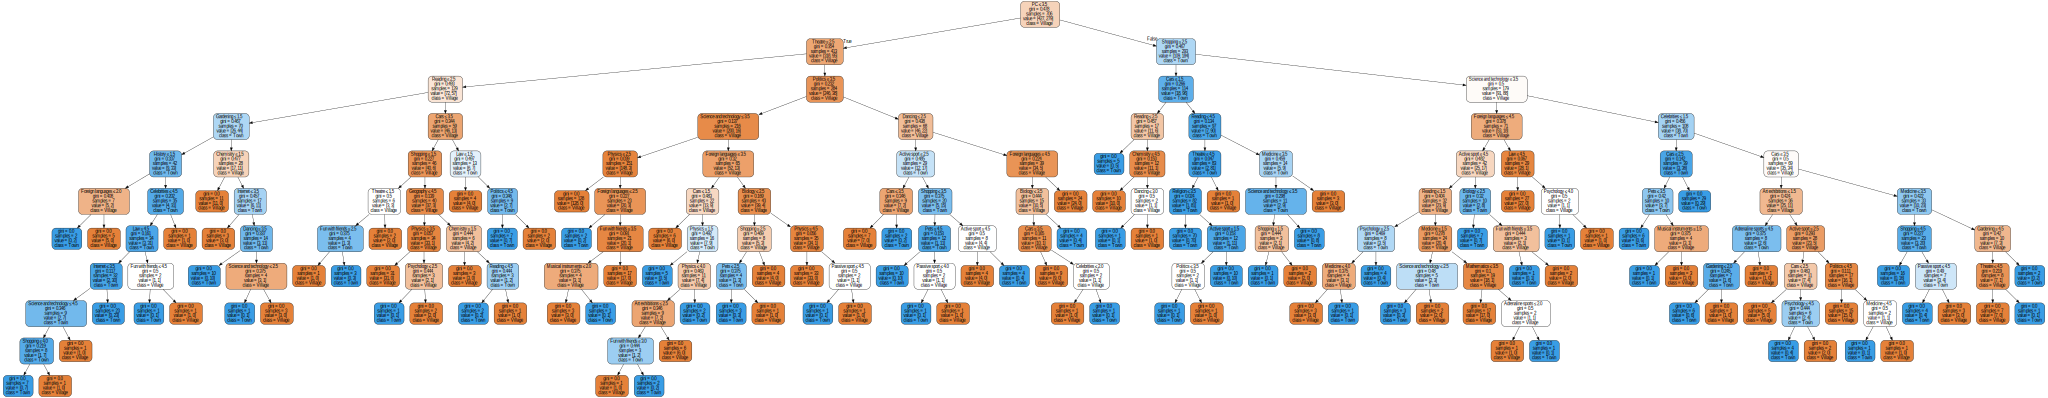

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart
ax.barh(feature_importances['feature'], feature_importances['importance'], color='blue')

# Add axis labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')

# Invert the y-axis so that the most important features are at the top
ax.invert_yaxis()

# Show the plot
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=['Village', 'Town'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # save the visualization to a file
graph  # display the visualization in the notebook


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lifeInterests1Df.drop('Gender', axis=1), lifeInterests1Df['Gender'], test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances using permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

                   feature  importance
6                       PC    0.043503
26                Shopping    0.040113
15                    Cars    0.021469
27  Science and technology    0.019209
19                 Dancing    0.012429
11               Geography    0.011864
23            Active sport    0.011299
4                  Physics    0.008475
28                 Theatre    0.007910
22           Passive sport    0.006780
17                Religion    0.004520
10                 Reading    0.004520
29        Fun with friends    0.003955
9                Chemistry    0.002825
16         Art exhibitions    0.002825
20     Musical instruments    0.002825
14                     Law    0.002825
0                  History    0.002825
2                 Politics    0.001130
21                 Writing    0.000565
7       Economy Management    0.000565
3              Mathematics   -0.001130
30       Adrenaline sports   -0.001130
31                    Pets   -0.001130
8                  Biolog

-------------------------------------------------------------------------------

connection between outdoor activities and the location (village or city)

<ipython-input-14-57ae58b93ce9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_outdoor_df.dropna(inplace=True)


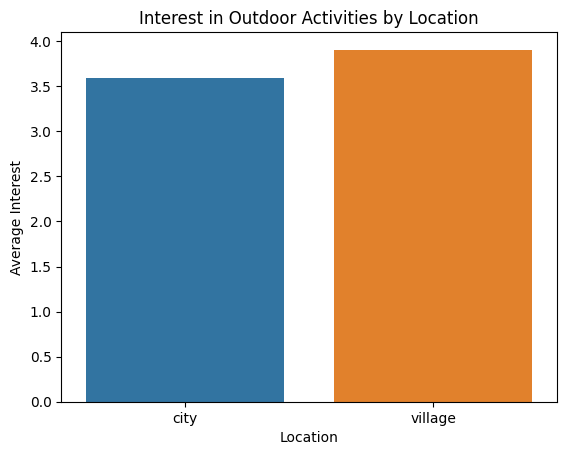

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a subset of the data that includes only location and interest in outdoor activities columns
location_outdoor_df = df[["Village - town", "Countryside, outdoors"]]

# Remove any rows that contain missing data
location_outdoor_df.dropna(inplace=True)

# Create a pivot table that shows the average interest in outdoor activities for each location category
location_pivot = location_outdoor_df.pivot_table(index="Village - town", values="Countryside, outdoors", aggfunc="mean")

# Create a bar plot to visualize the average interest in outdoor activities by location
sns.barplot(x=location_pivot.index, y=location_pivot["Countryside, outdoors"])
plt.title("Interest in Outdoor Activities by Location")
plt.xlabel("Location")
plt.ylabel("Average Interest")
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table that shows the frequency of each combination of location and interest in outdoor activities
contingency_table = pd.crosstab(location_outdoor_df["Village - town"], location_outdoor_df["Countryside, outdoors"])

# Run the chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results of the test
print("Chi-Square Test of Independence")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test of Independence
Chi2 Statistic: 17.952251691000694
P-Value: 0.0012608981148405777
Degrees of Freedom: 4
Expected Frequencies:
[[ 43.586  77.33  152.551 210.9   218.633]
 [ 18.414  32.67   64.449  89.1    92.367]]


-----------------------------------------------------------------------------

is there any connection between whether you an only child and interst in reading?

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table of the Only Child and Reading variables
contingency_table = pd.crosstab(df["Only child"], df["Reading"])

# Run the chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results of the test
print("Chi-Square Test of Independence")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")


Chi-Square Test of Independence
Chi-Square Statistic: 2.6895551526876194
P-Value: 0.6110435601662423


-------------------------------------------------------------------------------

is there any connection between dominant hand and interest in music instruments?

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Select the subset of data for the Musical Instruments interest
music_df = df[["Musical instruments", "Left - right handed"]]

# Remove any rows that contain missing data
music_df.dropna(inplace=True)

# Split the data into two groups based on whether the respondent is left-handed or right-handed
left_data = music_df[music_df['Left - right handed'] == 'left handed']
right_data = music_df[music_df['Left - right handed'] == 'right handed']

# Perform a two-sample t-test to compare the mean interest in musical instruments between the two groups
t_stat, p_val = ttest_ind(left_data['Musical instruments'], right_data['Musical instruments'])

print("t-statistic: ", t_stat)
print("p-value: ", p_val)


t-statistic:  0.5737961496799955
p-value:  0.5662342661127476


<ipython-input-17-cc37fc2f2409>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df.dropna(inplace=True)


---------------------------------------------------------------------------

connection between fun with friends and active sport

In [ ]:
# Calculate the correlation coefficient between "Fun with friends" and "Active sport"
correlation = df['Fun with friends'].corr(df['Active sport'])

# Print the correlation coefficient
print('Correlation coefficient:', correlation)


Correlation coefficient: 0.12622529646046465


-------------------------------------------------------------------------------

Association between interest in music and interest in dancing

In [ ]:
# Remove any rows that contain missing data
df.dropna(inplace=True)

# Select columns of interest
music_interest = df['Musical instruments']
dancing_interest = df['Dancing']

# Calculate Pearson correlation coefficient
correlation_coef = np.corrcoef(music_interest, dancing_interest)[0, 1]

print("Pearson correlation coefficient between interest in music and interest in dancing:", correlation_coef)


Pearson correlation coefficient between interest in music and interest in dancing: 0.22874876519675685


--------------------------------------------------------------------------------

there is any connection between location and interest in gardening?

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select the columns for location and interest in gardening
X = df[['Village - town']]
X['Village - town'] = df['Village - town'].replace({'village': 1, 'city': 0})
y = df['Gardening']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [0.39946152]
Intercept: 1.7654320987654317


<ipython-input-20-188b25a3f584>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Village - town'] = df['Village - town'].replace({'village': 1, 'city': 0})


In this example, we're using the LinearRegression class from scikit-learn to create a linear regression model. We're selecting the columns for location and interest in gardening from the DataFrame and using them as the input variables (X) and target variable (y), respectively. We then fit the model to the data using the fit() method.

The coeff_ attribute of the model contains the coefficients for the input variables, and the intercept_ attribute contains the intercept of the model. These values can be used to predict the target variable (y) based on new values of the input variable (X).